In [678]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [679]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [681]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [682]:
import seaborn as sns

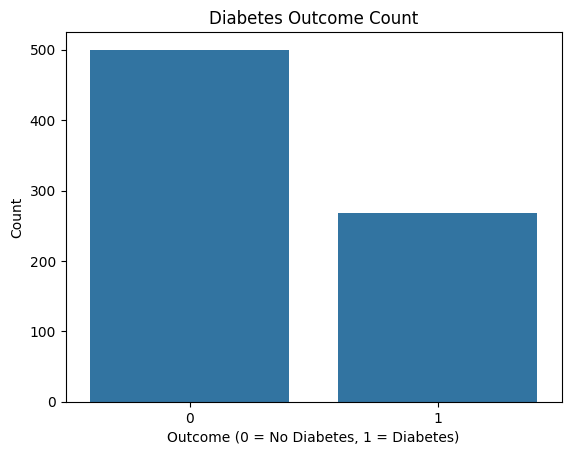

In [683]:
import matplotlib.pyplot as plt

sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Count')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.savefig("images/countplot_outcome.png")
plt.show()

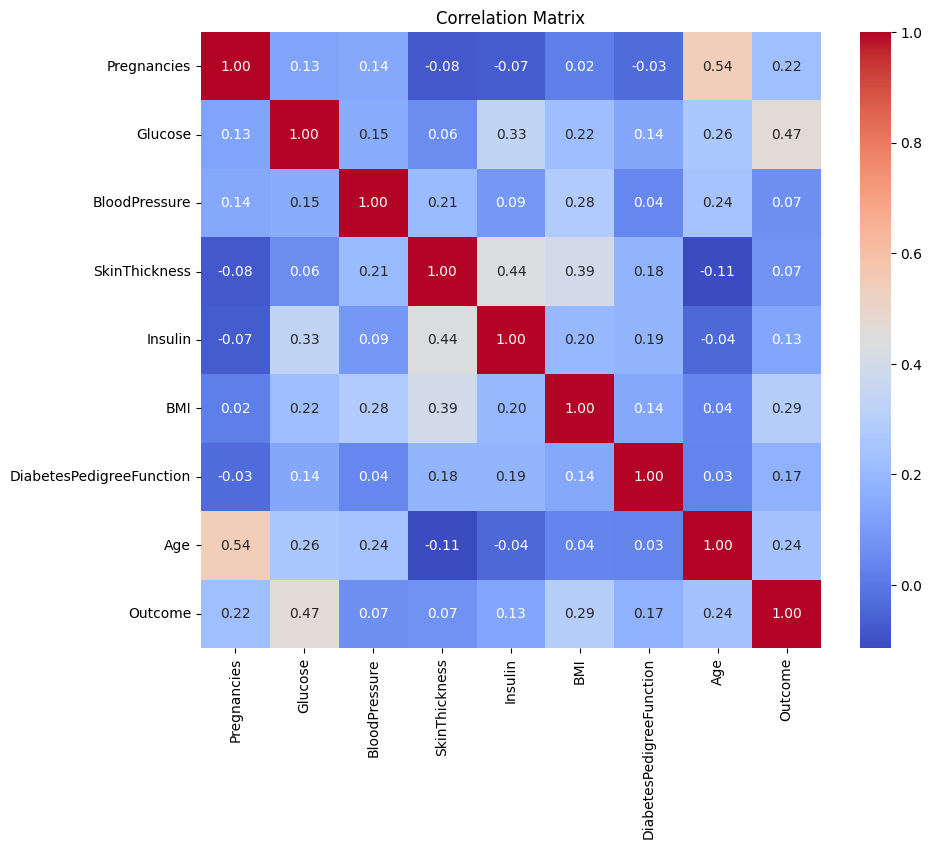

In [684]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig("images/correlation_heatmap.png")
plt.show()

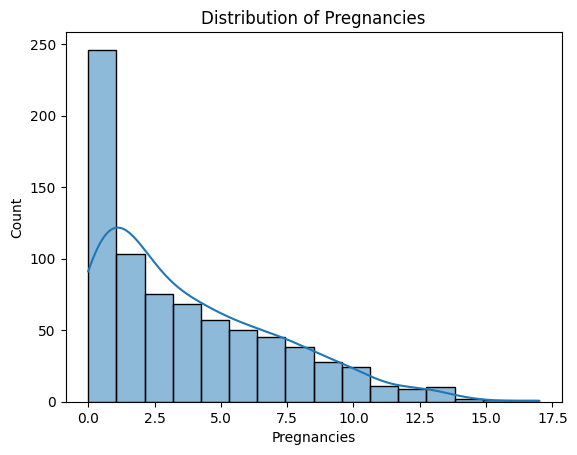

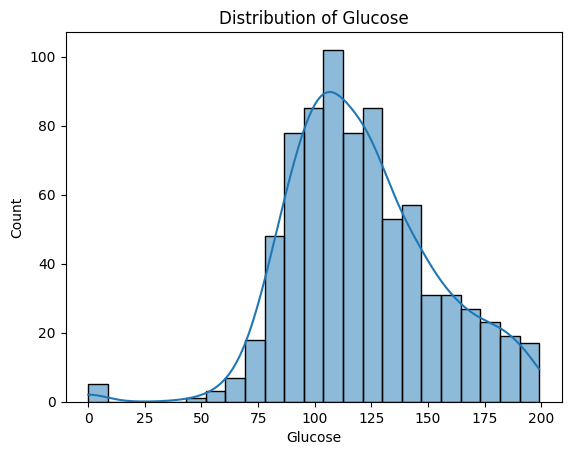

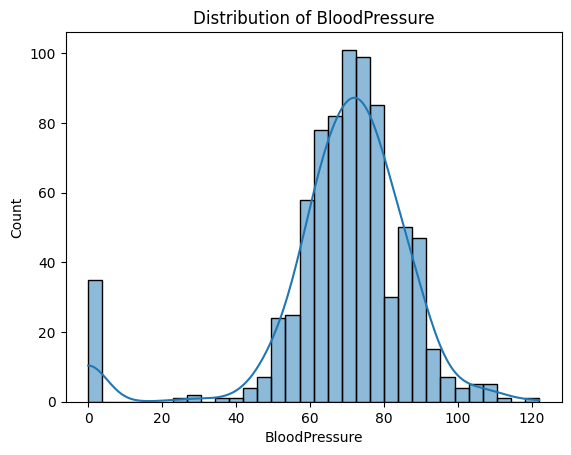

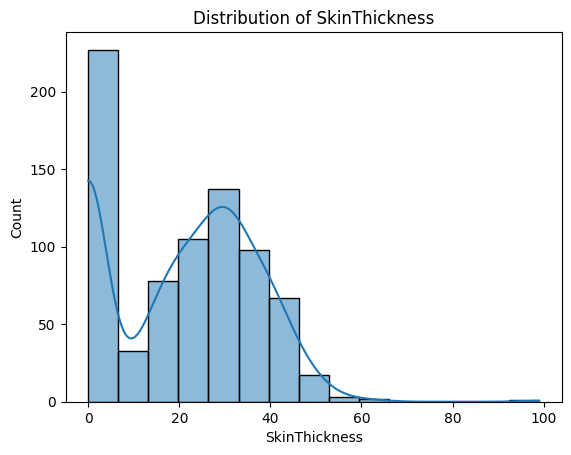

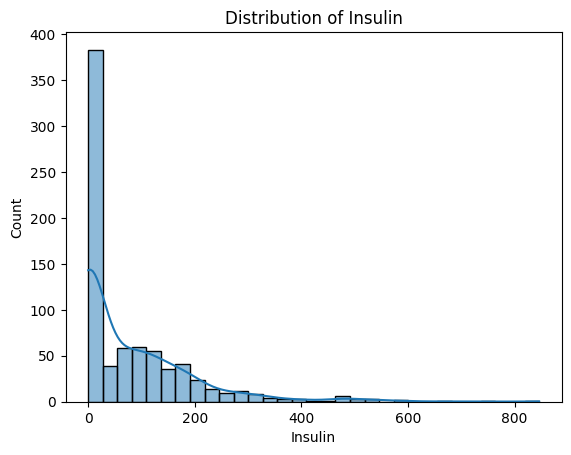

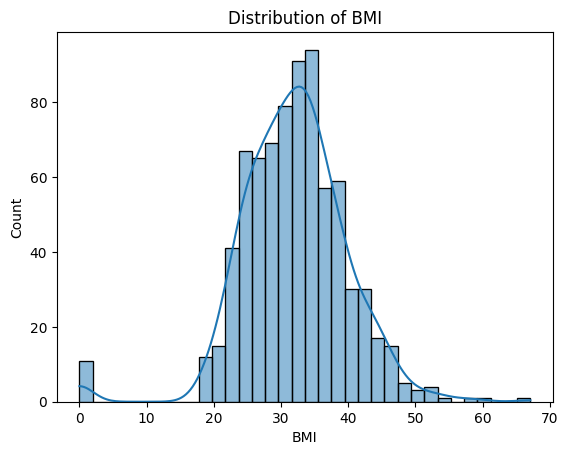

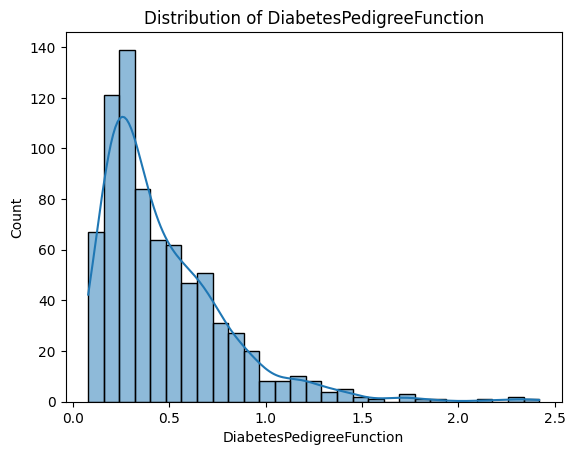

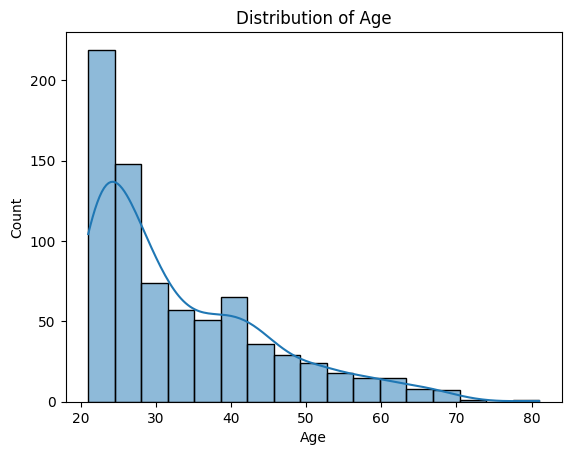

In [685]:
for col in df.columns[:-1]:  # skip 'Outcome' because it's the target
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f"images/histplot_{col}.png")
    plt.show()

In [686]:
from sklearn.linear_model import LogisticRegression

In [687]:
from sklearn.model_selection import train_test_split

In [688]:
from sklearn.metrics import accuracy_score

In [689]:
# 1. Split features and target
X = df.drop('Outcome', axis=1)  # All columns except 'Outcome'
y = df['Outcome']              # The target column

In [690]:
# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 3. Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


In [692]:
# 4. Predict on test set
y_pred = model.predict(X_test)

In [693]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[78 21]
 [18 37]]


In [694]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [695]:
# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.68%


In [696]:
# Columns where 0 is not valid
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Check how many zeros are in each
for col in invalid_zero_cols:
    print(f"{col} has {(df[col] == 0).sum()} zeros")

Glucose has 5 zeros
BloodPressure has 35 zeros
SkinThickness has 227 zeros
Insulin has 374 zeros
BMI has 11 zeros


In [697]:
import numpy as np

df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

In [698]:
# Impute with median (robust to outliers)
df[invalid_zero_cols] = df[invalid_zero_cols].fillna(df[invalid_zero_cols].median())

In [699]:
duplicates = df.duplicated().sum()
print (duplicates)

0


In [700]:
if duplicates > 0:
    df = df.drop_duplicates()

In [701]:
print(df.dtypes)

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [702]:
print("🔹 Head:")
print(df.head())
print("\n🔹 Info:")
print(df.info())
print("\n🔹 Description:")
print(df.describe())

🔹 Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose     

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

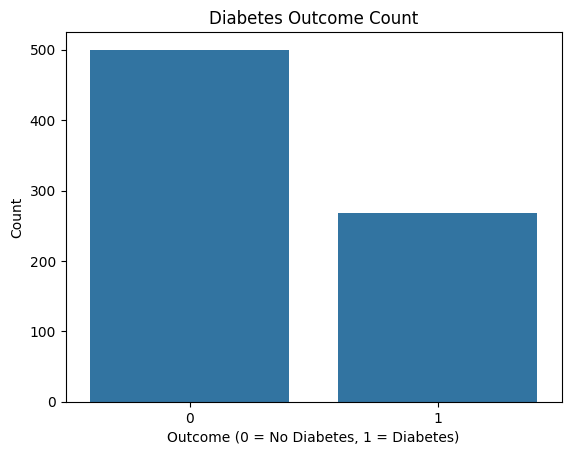

In [703]:
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Count')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.savefig("images/countplot_outcome_after_cleaning.png")
plt.show()

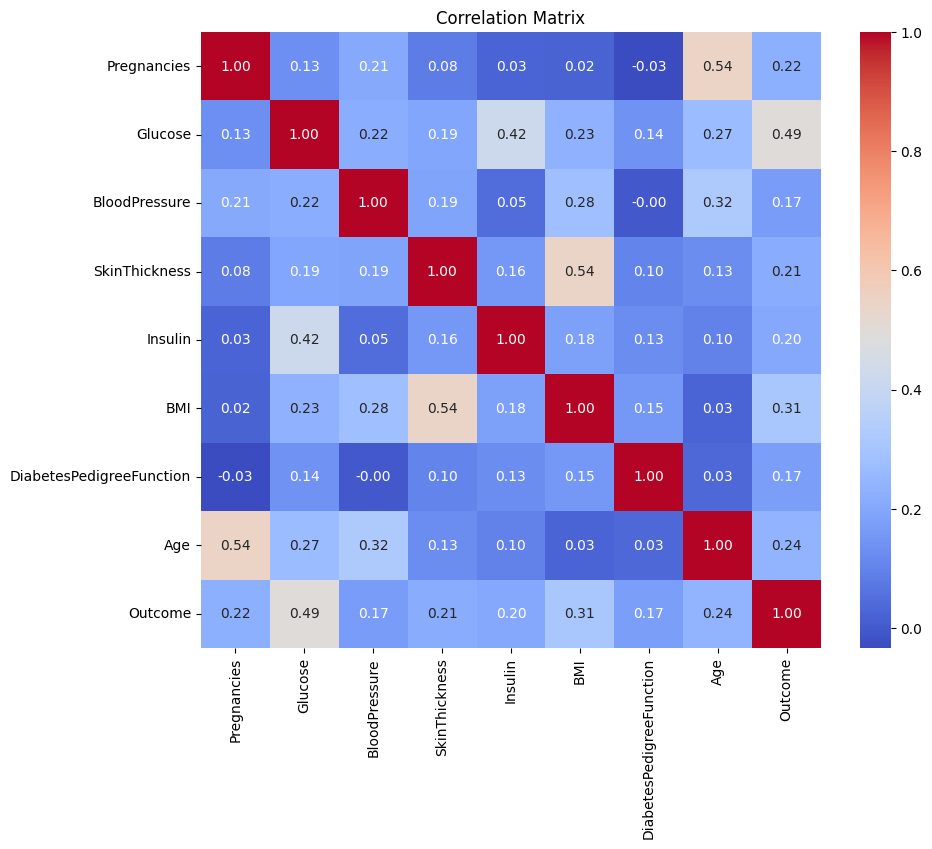

In [704]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig("images/correlation_heatmap_after_cleaning.png")
plt.show()

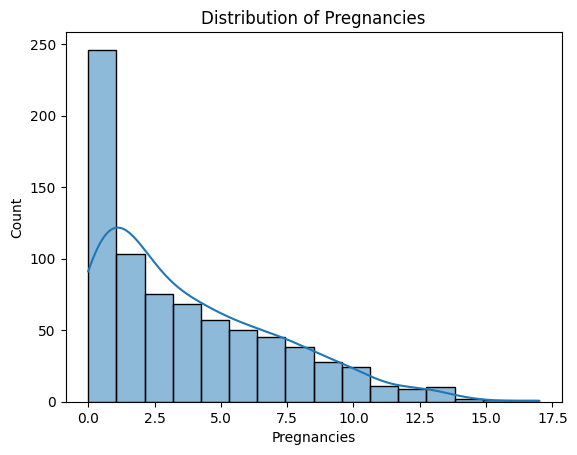

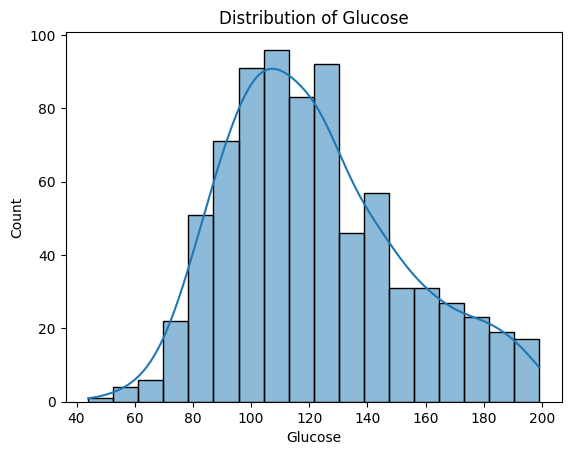

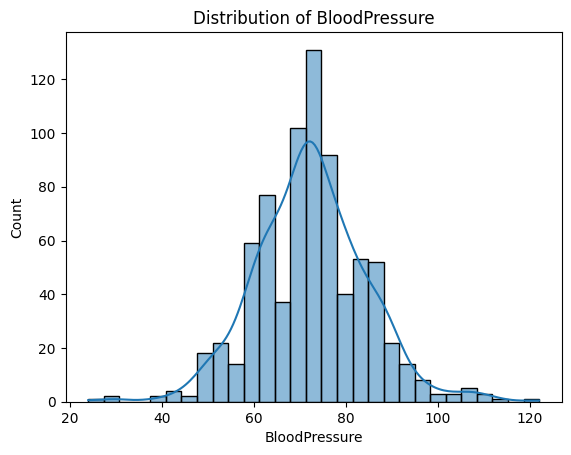

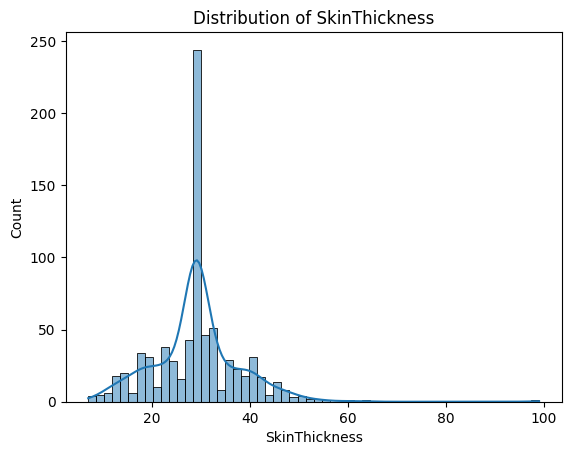

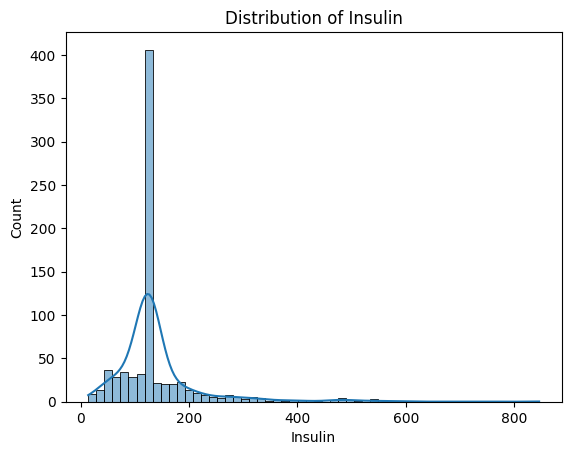

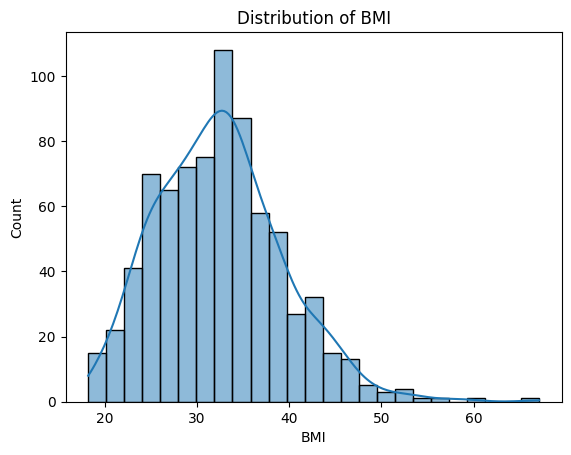

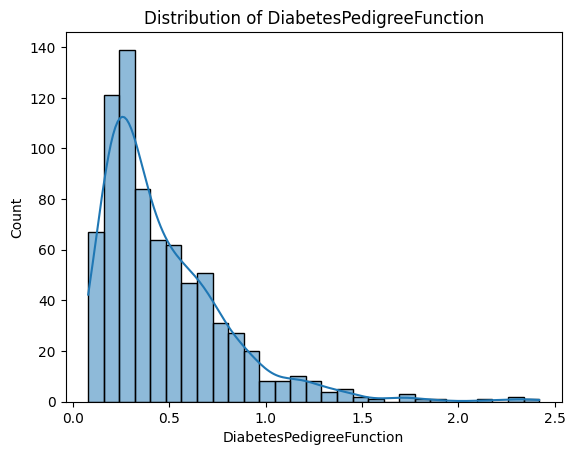

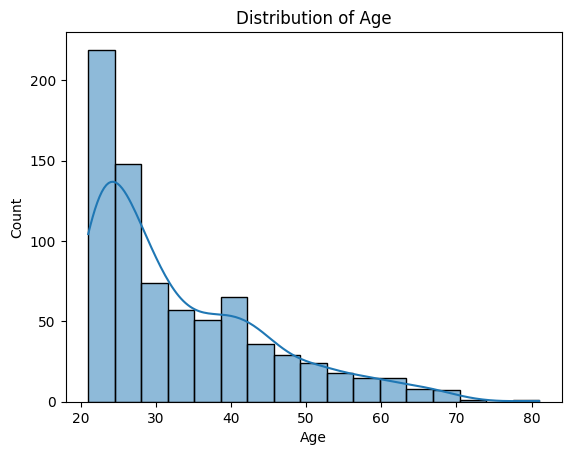

In [705]:
for col in df.columns[:-1]:  # skip 'Outcome' because it's the target
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f"images/histplot_{col}_after_cleaning.png")
    plt.show()

In [ ]:
# 1. Split features and target after cleaning
X = df.drop('Outcome', axis=1)  # All columns except 'Outcome'
y = df['Outcome']              # The target column

In [ ]:
# 2. Split into train and test sets after cleaning
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 3. Create and train the model after cleaning
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


In [ ]:
# 4. Predict on test set
y_pred = model.predict(X_test)

In [710]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[82 17]
 [21 34]]


In [711]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# 5. Evaluate the model after cleaning
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after cleaning: {accuracy * 100:.2f}%")

Accuracy after cleaning: 75.32%
